### Automatic controller designed to predict the values of a target series using predictive series and moving averages. In this example, I attempt to forecast gold spot prices at time _t +  **ph**_ (where time is measured in days) using gold spot prices, silver spot prices, and treasury inflation protected securities (TIPS) prices at time _t_. ###

In [1]:
import autograd.numpy as np
import reinforcement_learning
import matplotlib.pyplot as plt
from custom_library import variable_order_plotters as plotter

%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

In [2]:
csvname = 'glddata.csv'
data = np.loadtxt(csvname,delimiter = ',')

target_series = data[:,1]        #gold
predictor_series1 = data[:,0]    #silver
predictor_series2 = data[:,2]    #TIPS

In [3]:
ma = 30                 #moving average window length
ph = 30                 #predictive horizon
train_ratio = 0.8       #fraction of data to be used for training, must be in interval (0,1]
learning_rate = 0.1     #rate of gradient descent
num_its = 30            #number of iterations of gradient descent

In [4]:
v = [target_series, target_series, predictor_series1, predictor_series2]
rl = reinforcement_learning.Setup(v,ph,ma,train_ratio)

#moving average series with window length ma
ma_t = rl.ma_builder(target_series)
ma_p1 = rl.ma_builder(predictor_series1)
ma_p2 = rl.ma_builder(predictor_series2)

v.append(ma_t)

#normalization of input features
v_norm, v_eq = rl.standard_normalizer(v)
rl.v = v_norm

<IPython.core.display.Javascript object>


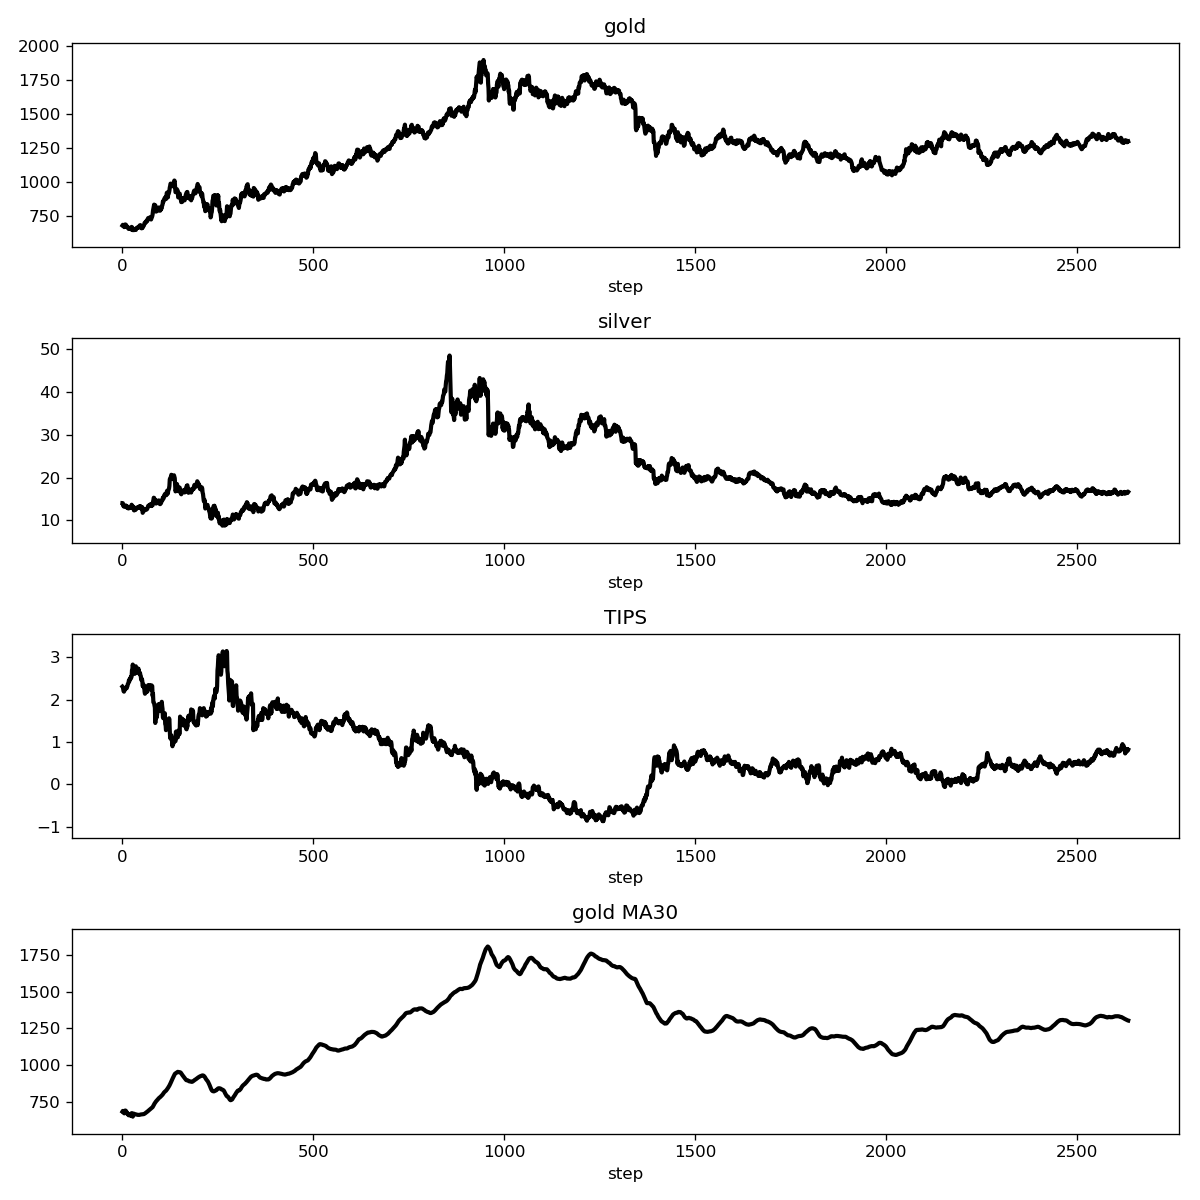

In [5]:
plotter.plot_n(v[1:], ['gold','silver','TIPS','gold MA' + str(ma)])

In [6]:
w_hist,train_hist = rl.gradient_descent(rl.least_squares,learning_rate,num_its,0.1 * np.random.randn(len(v), ), v_norm)

In [7]:
ind = np.argmin(train_hist)
w_best = w_hist[ind]
print("best w:", np.round(w_best,3))
s_predict = rl.loop(w_best,v_norm)
print("realized error margin:", np.round(np.sum(np.abs(v_eq[1](s_predict)[0] - v[0]))/float(len(v[0])-ph),2))

best w: [ 0.003  0.424  0.233 -0.077  0.238]
realized error margin: 47.2


<IPython.core.display.Javascript object>


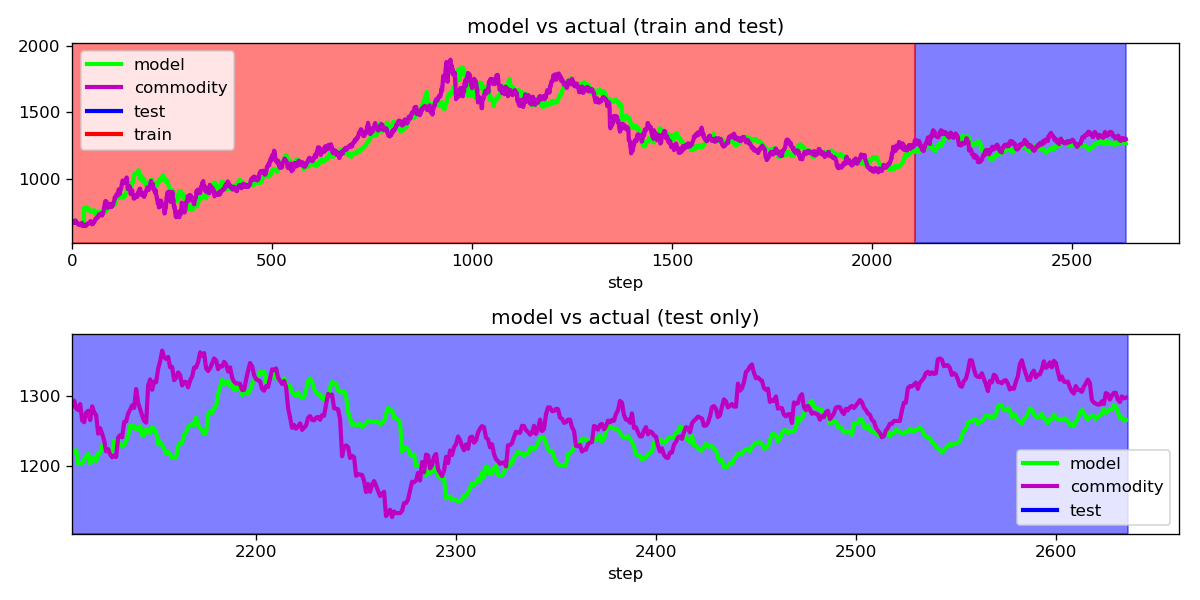

In [8]:
plotter.plot_multiples([v_eq[1](rl.loop(w_best,v_norm,len(v[0])))[0],v[0]],train=train_ratio)